# Figures & Tables
for the AGENT historical **wheat** data paper  

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data points

In [2]:
data_points <- list.files(recursive=TRUE, pattern="wheat.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                map(mutate, accenumb = as.character(accenumb)) |>
                map(mutate, doi = as.character(doi)) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub("_wheat.csv", "", dataset))
data_points |> glimpse()

Rows: 115,513
Columns: 52
$ dataset                                         <chr> "CREA", "CREA", "CREA"…
$ accenumb                                        <chr> "TA00001", "TA00001", …
$ agent_id                                        <chr> NA, NA, NA, NA, NA, NA…
$ doi                                             <chr> NA, NA, NA, NA, NA, NA…
$ days_to_heading                                 <dbl> 128, 127, 127, 127, 12…
$ plant_height                                    <dbl> 74, 84, 78, 80, 66, 68…
$ thousand_kernel_weight                          <dbl> 47.5, 45.8, 46.1, 47.2…
$ powdery_mildew                                  <dbl> 3, 5, 3, 5, 3, 0, 0, 2…
$ leaf_rust                                       <dbl> 3, 3, 1, 3, 3, 0, 0, 2…
$ yellow_rust                                     <lgl> NA, NA, NA, NA, NA, NA…
$ septoria_tritici_ssp                            <dbl> 1, 0, 0, 0, 0, 0, 0, 0…
$ protein_content                                 <dbl> 11.1, 11.2, 10.9, 11.9…
$ sds_sediment

todo: re-fetch all excel data using all columns and forcing datatypes, then sanitize colnames with proper tidyverse function and deduplicate where possible

### 3 traits replication years counts

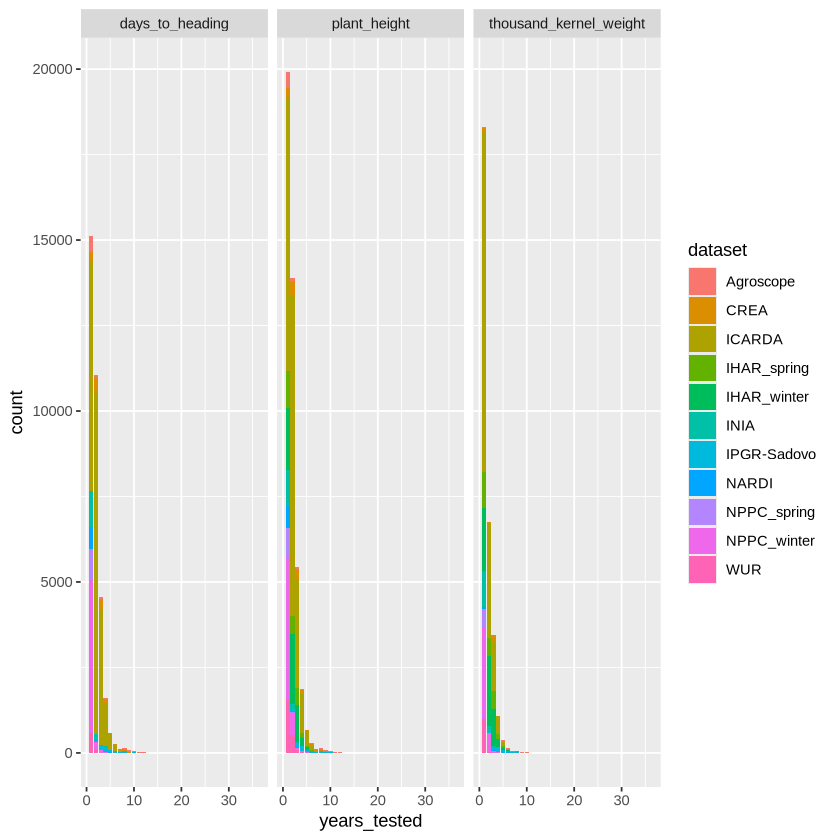

In [3]:
data_points |> select(dataset, campaign, accenumb, days_to_heading, plant_height, thousand_kernel_weight) |>
pivot_longer(cols = days_to_heading:thousand_kernel_weight, names_to = "trait") |> drop_na() |>
select(-value) |> unique() |>
summarise(years_tested=n(), .by=c(dataset, accenumb, trait)) |>
ggplot(aes(years_tested, fill=dataset))+geom_bar() + facet_wrap(~trait)

neat but a bit too small to read comfortably

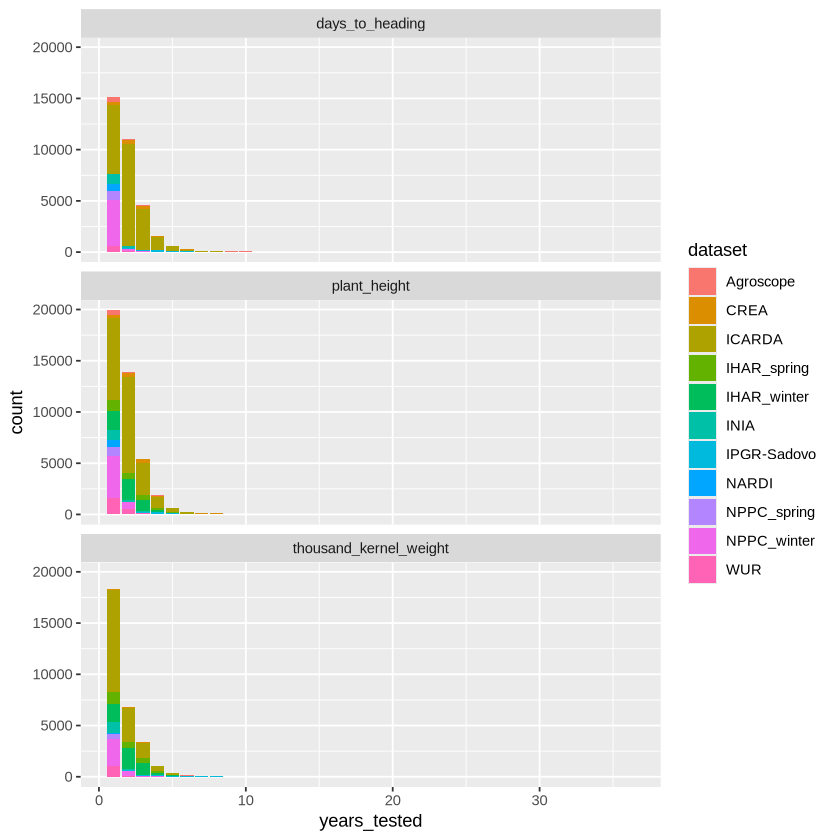

In [4]:
data_points |> select(dataset, campaign, accenumb, days_to_heading, plant_height, thousand_kernel_weight) |>
pivot_longer(cols = days_to_heading:thousand_kernel_weight, names_to = "trait") |> drop_na() |>
select(-value) |> unique() |>
summarise(years_tested=n(), .by=c(dataset, accenumb, trait)) |>
ggplot(aes(years_tested, fill=dataset))+geom_bar() + facet_wrap(~trait, dir="v")

### days_to_heading replication years counts
trying out the for individual traits as well in case it's better for the paper 

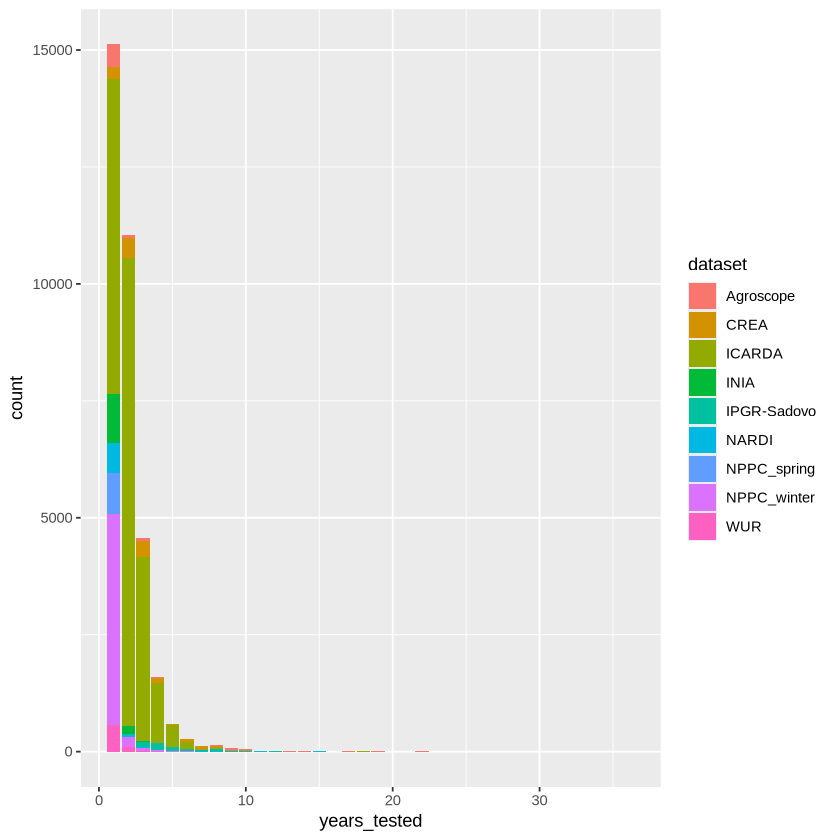

In [5]:
data_points |> select(dataset, campaign, accenumb, days_to_heading) |> drop_na() |> unique() |>
select(-days_to_heading) |> unique() |>
summarise(years_tested=n(), .by=c(accenumb, dataset)) |> arrange(desc(years_tested)) |>
ggplot(aes(years_tested, fill=dataset))+geom_bar()

## Data quality

In [6]:
data_quality <- list.files(recursive=TRUE, pattern="wheat_data_quality.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub("_wheat_data_quality.csv", "", dataset))
data_quality

dataset,trait,heritability,var_G,var_E,no_campaigns
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CREA,days_to_heading,0.883,32.238,19.884,4.668
CREA,plant_height,0.947,425.644,119.755,5.013
CREA,thousand_kernel_weight,0.872,27.826,21.587,5.288
CREA,powdery_mildew,0.040,0.073,4.424,2.535
CREA,leaf_rust,0.370,0.496,2.718,3.220
CREA,septoria_tritici_ssp,0.067,0.035,1.738,3.572
CREA,protein_content,0.756,1.093,2.688,7.629
CREA,sds_sedimentation_volume,0.913,66.261,46.837,7.432
ICARDA,days_to_heading,0.657,38.227,90.886,4.547


## BLUE values

In [7]:
BLUE_values <- list.files(recursive=TRUE, pattern="wheat_BLUE_values.csv$") |>
                set_names(basename) |>
                map(read_csv, show_col_types=FALSE) |>
                map(mutate, genotype = as.character(genotype)) |>
                list_rbind(names_to = "dataset") |>
                mutate(dataset = gsub("_wheat_BLUE_values.csv", "", dataset))
BLUE_values |> glimpse()

Rows: 42,918
Columns: 13
$ dataset                       <chr> "CREA", "CREA", "CREA", "CREA", "CREA", …
$ genotype                      <chr> "TA00001", "TA00002", "TA00003", "TA0000…
$ days_to_heading_BLUE          <dbl> 126.22, 124.81, 123.82, 123.23, 123.03, …
$ plant_height_BLUE             <dbl> 67.69, 66.66, 64.05, 68.51, 97.52, 77.64…
$ thousand_kernel_weight_BLUE   <dbl> 39.33, 26.82, NA, NA, 37.58, 34.15, NA, …
$ powdery_mildew_BLUE           <dbl> 2.76, 1.17, 4.53, 1.97, 1.48, 1.17, 0.10…
$ leaf_rust_BLUE                <dbl> 2.61, 1.89, 3.66, 2.00, 3.56, 2.66, 2.74…
$ septoria_tritici_ssp_BLUE     <dbl> 3.38, 3.28, NA, 3.54, 3.10, 3.22, 3.08, …
$ protein_content_BLUE          <dbl> 13.16, 14.32, NA, NA, 14.40, 13.03, NA, …
$ sds_sedimentation_volume_BLUE <dbl> 44.75, 44.21, NA, NA, 57.05, 45.18, NA, …
$ end_of_heading_BLUE           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ plant_density_BLUE            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ dry_matter_yi

In [8]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/erwan/micromamba/envs/R/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3 forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4    
 [5] purrr_1.0.2     readr_2.1.5     tidyr_1.3.1     tibble_3.2.1   
 [9] ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] bit_4.5